<a href="https://colab.research.google.com/github/nipunbatra/ml-teaching/blob/master/notebooks/tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='retina'

In [2]:
M, N, K = 40, 30, 20

A_np = np.random.randn(M, K)
B_np = np.random.randn(K, N)

In [3]:
A_np.shape

(40, 20)

In [4]:
tic = time.time()
C_np = A_np@B_np
toc = time.time()
print(toc-tic)

0.001062154769897461


In [5]:
def time_function(func, args=(), n_iter=10):
    """
    Measures the execution time of a function over multiple iterations.

    Parameters:
    func (callable): The function to be timed.
    args (tuple): The arguments to pass to the function.
    n_iter (int): The number of iterations to run the function.

    Returns:
    np.ndarray: An array of execution times per iteration in seconds.
    """
    timings = np.zeros(n_iter)

    for i in range(n_iter):
        start_time = time.time()
        func(*args)
        end_time = time.time()

        timings[i] = end_time - start_time

    return timings


In [6]:
def mm(A, B):
  return A@B

In [12]:
M, N, K = 1000, 1000, 1000
A_np = np.random.randn(M, K)
B_np = np.random.randn(K, N)
timings_numpy = time_function(mm, args=(A_np, B_np), n_iter=100)

In [13]:
timings_numpy

array([0.016289  , 0.01717305, 0.0177319 , 0.01777315, 0.01613069,
       0.01745892, 0.01651978, 0.01939702, 0.01579428, 0.01587319,
       0.01608706, 0.01417089, 0.01438093, 0.01422   , 0.01515913,
       0.01523018, 0.01510096, 0.01514196, 0.01523805, 0.02044392,
       0.01564121, 0.01395583, 0.01647115, 0.01535106, 0.01428986,
       0.01410389, 0.01599479, 0.01514792, 0.01513696, 0.01560783,
       0.01368022, 0.01542401, 0.01463914, 0.01387072, 0.01423097,
       0.0146029 , 0.0171392 , 0.01553369, 0.01486421, 0.01637197,
       0.01645088, 0.01402497, 0.01469588, 0.01534796, 0.01405406,
       0.01513219, 0.01508904, 0.01599312, 0.01427507, 0.01430011,
       0.01630902, 0.01597834, 0.01514888, 0.01527619, 0.0153892 ,
       0.01557493, 0.01491117, 0.01644635, 0.01448703, 0.01438189,
       0.01430511, 0.01405096, 0.0156219 , 0.01632905, 0.01638031,
       0.01555705, 0.01478577, 0.01565099, 0.0145731 , 0.0160861 ,
       0.01578903, 0.01573801, 0.01575208, 0.01500297, 0.01475

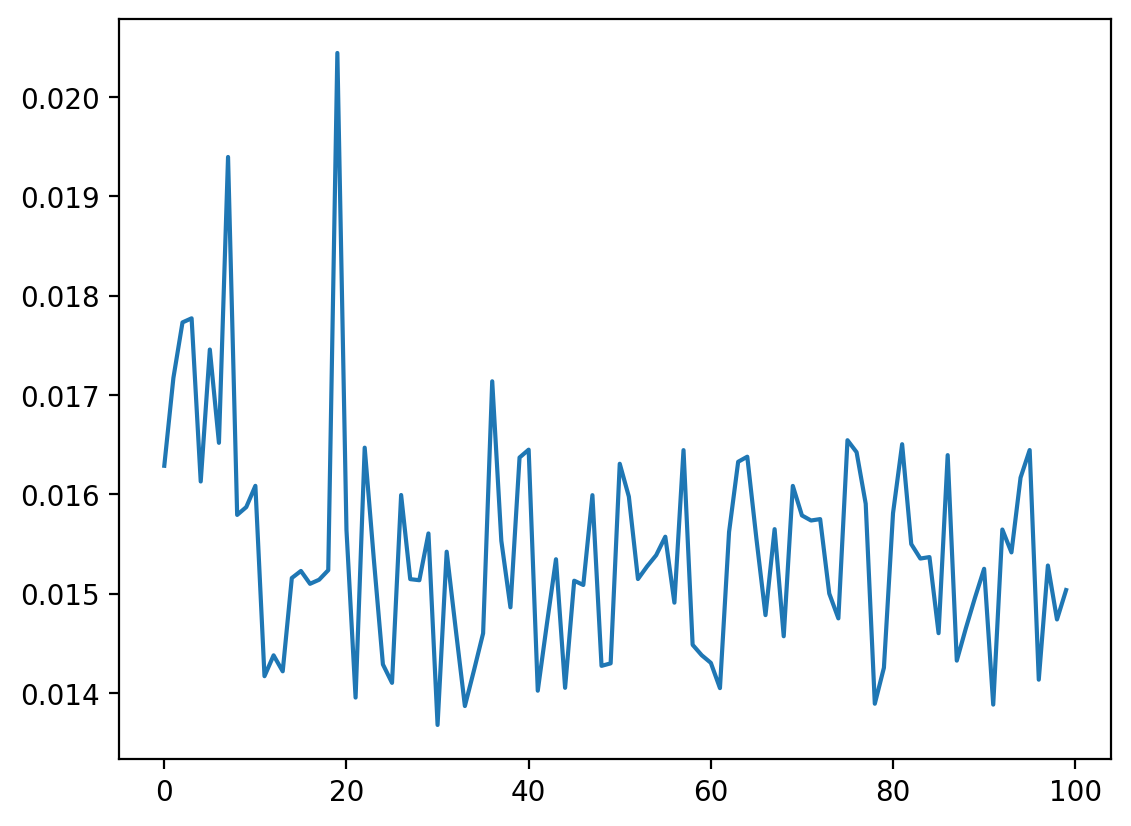

In [14]:
plt.plot(timings_numpy)

In [10]:
def mm_list(A, B):
    C = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
    return C

In [15]:
A_list = A_np.tolist()
B_list = B_np.tolist()

timings_list = time_function(mm_list, args=(A_list, B_list), n_iter=2)

KeyboardInterrupt: 

In [16]:
# use timeit to get a more accurate estimate along with the standard deviation
import timeit

time_numpy = timeit.timeit('mm(A_np, B_np)', globals=globals(), number=100)

In [18]:
%timeit mm(A_np, B_np)

15.5 ms ± 285 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
